In [132]:
import pandas as pd
import numpy as np
import os as os
import matplotlib.pyplot as plt
import seaborn as sns

### Params

In [133]:
filename='/Users/gurlwithcurlz/Dropbox (Personal)/Kaggle/CoronaVirus/2019_nCoV_data.csv'


### Load data

In [134]:
data=pd.read_csv(filename)

In [135]:
data.head()

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0
1,2,01/22/2020 12:00:00,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0
2,3,01/22/2020 12:00:00,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0
3,4,01/22/2020 12:00:00,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0
4,5,01/22/2020 12:00:00,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0


In [136]:
data[data['Country']=='Malaysia']

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
78,79,01/23/2020 12:00:00,NaN,Malaysia,01/23/2020 12:00:00,0.0,0.0,0.0
167,168,01/25/2020 22:00:00,NaN,Malaysia,01/25/2020 12:00:00,3.0,0.0,0.0
213,214,01/26/2020 23:00:00,NaN,Malaysia,01/26/2020 23:00:00,4.0,0.0,0.0
259,260,01/27/2020 20:30:00,NaN,Malaysia,01/27/2020 20:30:00,4.0,0.0,0.0
311,312,01/28/2020 23:00:00,NaN,Malaysia,01/28/2020 23:00:00,7.0,0.0,0.0
364,365,01/29/2020 21:00:00,NaN,Malaysia,01/29/2020 21:00:00,7.0,0.0,0.0
420,421,01/30/2020 21:30:00,NaN,Malaysia,01/30/2020 21:30:00,8.0,0.0,0.0
479,480,01/31/2020 19:00:00,NaN,Malaysia,01/31/2020 19:00:00,8.0,0.0,0.0
534,535,02/01/2020 23:00:00,NaN,Malaysia,1/31/2020 8:15,8.0,0.0,0.0
602,603,02/02/2020 21:00:00,NaN,Malaysia,1/31/2020 8:15,8.0,0.0,0.0


### Regions affected

In [137]:
data.Country.nunique()

32

32 countries affected as of 4 Feb 2020

In [138]:
data.loc[data['Province/State'].isnull(),'Province/State']='Unknown'

In [139]:
countries_affected=data.groupby(['Country','Province/State'],as_index=False).last()

In [140]:
countries_affected

,Country,Province/State,Sno,Date,Last Update,Confirmed,Deaths,Recovered
0,Australia,New South Wales,743,02/04/2020 22:00:00,2020-01-02 18:12:00,4.0,0.0,2.0
1,Australia,Queensland,745,02/04/2020 22:00:00,2020-04-02 16:53:00,3.0,0.0,0.0
2,Australia,South Australia,747,02/04/2020 22:00:00,2020-02-02 22:33:00,2.0,0.0,0.0
3,Australia,Unknown,212,01/26/2020 23:00:00,01/26/2020 23:00:00,4.0,0.0,0.0
4,Australia,Victoria,744,02/04/2020 22:00:00,2020-01-02 18:12:00,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...
110,US,"Seattle, WA",769,02/04/2020 22:00:00,2020-01-02 19:43:00,1.0,0.0,0.0
111,US,"Tempe, AZ",770,02/04/2020 22:00:00,2020-01-02 19:43:00,1.0,0.0,0.0
112,US,Washington,469,01/31/2020 19:00:00,01/31/2020 19:00:00,1.0,0.0,0.0
113,United Arab Emirates,Unknown,742,02/04/2020 22:00:00,2020-02-02 05:43:00,5.0,0.0,0.0


In [141]:
countries_affected.Country.unique()

array(['Australia', 'Belgium', 'Brazil', 'Cambodia', 'Canada', 'China',
       'Finland', 'France', 'Germany', 'Hong Kong', 'India', 'Italy',
       'Ivory Coast', 'Japan', 'Macau', 'Mainland China', 'Malaysia',
       'Mexico', 'Nepal', 'Philippines', 'Russia', 'Singapore',
       'South Korea', 'Spain', 'Sri Lanka', 'Sweden', 'Taiwan',
       'Thailand', 'UK', 'US', 'United Arab Emirates', 'Vietnam'],
      dtype=object)

In [142]:
data.Country.unique()

array(['China', 'US', 'Japan', 'Thailand', 'South Korea',
       'Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'Singapore',
       'Philippines', 'Malaysia', 'Vietnam', 'Australia', 'Mexico',
       'Brazil', 'France', 'Nepal', 'Canada', 'Cambodia', 'Sri Lanka',
       'Ivory Coast', 'Germany', 'Finland', 'United Arab Emirates',
       'India', 'Italy', 'Sweden', 'Russia', 'Spain', 'UK', 'Belgium'],
      dtype=object)

In [143]:
countries_affected.Confirmed.sum()

25074.0

~25k people infected as of 5 Feb 2020

In [144]:
country_freq=countries_affected.groupby('Country',as_index=False).agg({'Confirmed':'sum'})

In [145]:
country_freq.sort_values('Confirmed',ascending=False)

,Country,Confirmed
15,Mainland China,24290.0
5,China,549.0
27,Thailand,25.0
21,Singapore,24.0
13,Japan,22.0
29,US,19.0
8,Germany,19.0
9,Hong Kong,18.0
0,Australia,17.0
22,South Korea,16.0


Ok, so there are 3 countries that have not reported any infections. So only 29 countries affected as of 5 Feb 2020.

#### China provinces affected

In [157]:
china_affected=data.loc[(data['Country']=='China') | (data['Country']=='Mainland China')].groupby('Province/State',as_index=False).last()
                

In [158]:
china_affected

,Province/State,Sno,Date,Country,Last Update,Confirmed,Deaths,Recovered
0,Anhui,707,02/04/2020 22:00:00,Mainland China,2020-05-02 01:13:00,530.0,0.0,20.0
1,Beijing,713,02/04/2020 22:00:00,Mainland China,2020-04-02 08:33:00,228.0,1.0,23.0
2,Chongqing,708,02/04/2020 22:00:00,Mainland China,2020-05-02 00:13:00,366.0,2.0,14.0
3,Fujian,714,02/04/2020 22:00:00,Mainland China,2020-04-02 12:13:00,194.0,0.0,3.0
4,Gansu,725,02/04/2020 22:00:00,Mainland China,2020-04-02 15:43:00,57.0,0.0,4.0
5,Guangdong,703,02/04/2020 22:00:00,Mainland China,2020-05-02 02:03:00,870.0,0.0,32.0
6,Guangxi,717,02/04/2020 22:00:00,Mainland China,2020-05-02 00:43:00,150.0,0.0,10.0
7,Guizhou,724,02/04/2020 22:00:00,Mainland China,2020-05-02 01:23:00,64.0,0.0,5.0
8,Hainan,720,02/04/2020 22:00:00,Mainland China,2020-05-02 02:53:00,91.0,1.0,4.0
9,Hebei,718,02/04/2020 22:00:00,Mainland China,2020-05-02 02:53:00,135.0,1.0,4.0


Hmm...Taiwan appears to be included in China

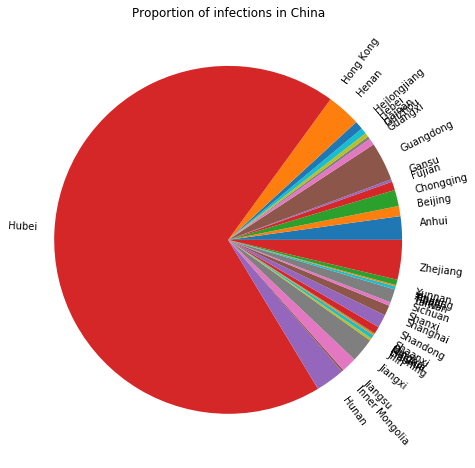

In [290]:
plt.figure(figsize=(8,8))
plt.pie(x=china_affected.Confirmed,labels=china_affected['Province/State'],rotatelabels=True)
plt.title('Proportion of infections in China')
plt.show()

### Spread of infection in China

In [193]:
china_data=data[(data['Country']=='China') | (data['Country']=='Mainland China')]

In [194]:
ch_provinces=china_data['Province/State'].unique()

In [195]:
ch_provinces

array(['Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong',
       'Guangxi', 'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan',
       'Hong Kong', 'Hubei', 'Hunan', 'Inner Mongolia', 'Jiangsu',
       'Jiangxi', 'Jilin', 'Liaoning', 'Macau', 'Ningxia', 'Qinghai',
       'Shaanxi', 'Shandong', 'Shanghai', 'Shanxi', 'Sichuan', 'Taiwan',
       'Tianjin', 'Tibet', 'Xinjiang', 'Yunnan', 'Zhejiang'], dtype=object)

In [196]:
china_data.loc[:,'Date']=pd.to_datetime(china_data.loc[:,'Date'])

In [198]:
china_data=china_data.sort_values('Date')

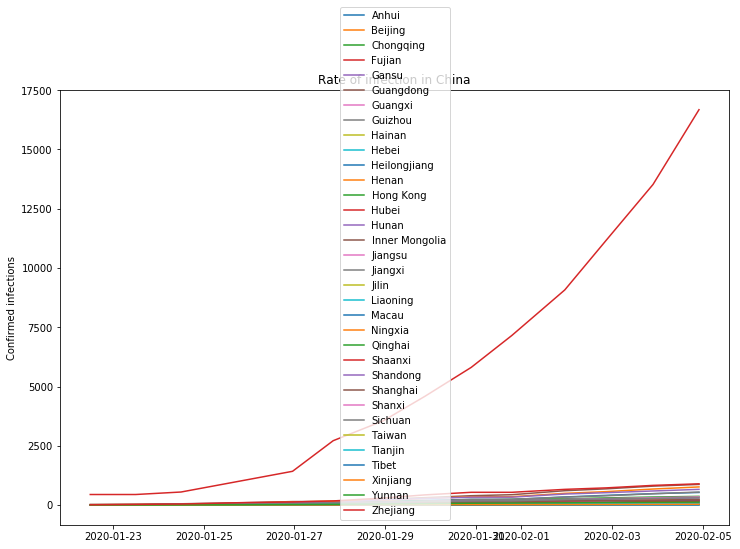

In [292]:
plt.figure(figsize=(12,8))
for province in ch_provinces:
    y=china_data.loc[china_data['Province/State']==province,'Confirmed']
    x=china_data.loc[china_data['Province/State']==province,'Date']
    plt.plot(x,y)
    
plt.legend(ch_provinces)
plt.ylabel('Confirmed infections')
plt.title('Rate of infection in China')
plt.show()

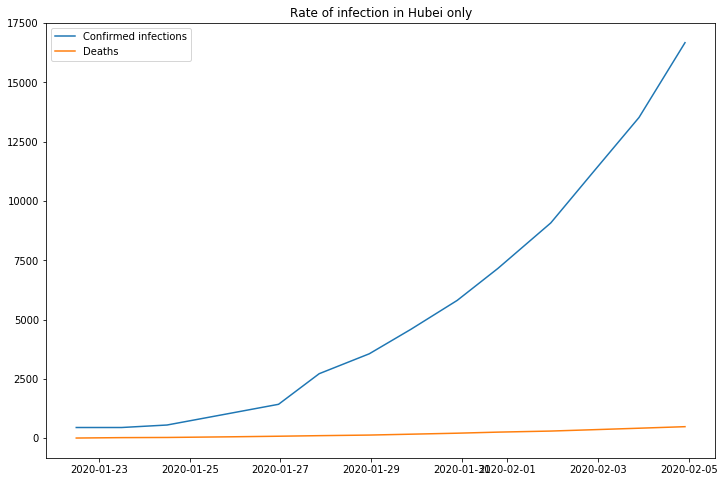

In [293]:
plt.figure(figsize=(12,8))
y=china_data.loc[china_data['Province/State']=='Hubei','Confirmed']
x=china_data.loc[china_data['Province/State']=='Hubei','Date']
y2=china_data.loc[china_data['Province/State']=='Hubei','Deaths']
plt.plot(x,y)
plt.plot(x,y2)
plt.title('Rate of infection in Hubei only')
plt.legend(['Confirmed infections','Deaths'])
plt.show()

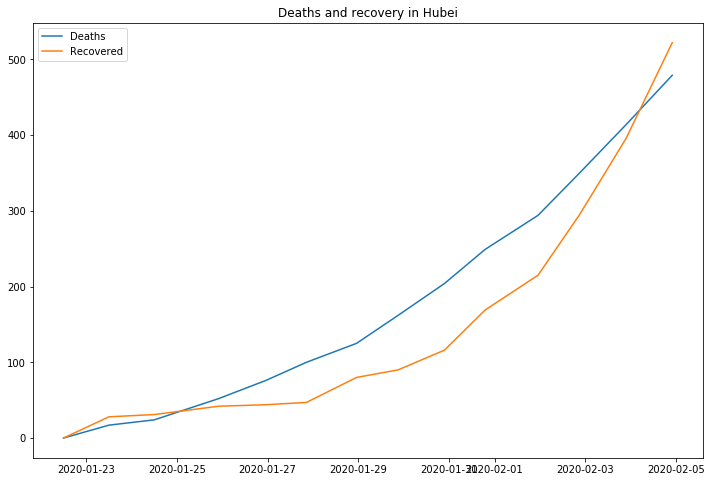

In [294]:
plt.figure(figsize=(12,8))
x=china_data.loc[china_data['Province/State']=='Hubei','Date']
y2=china_data.loc[china_data['Province/State']=='Hubei','Deaths']
y3=china_data.loc[china_data['Province/State']=='Hubei','Recovered']

plt.plot(x,y2)
plt.plot(x,y3)
plt.title('Deaths and recovery in Hubei')
plt.legend(['Deaths','Recovered'])
plt.show()

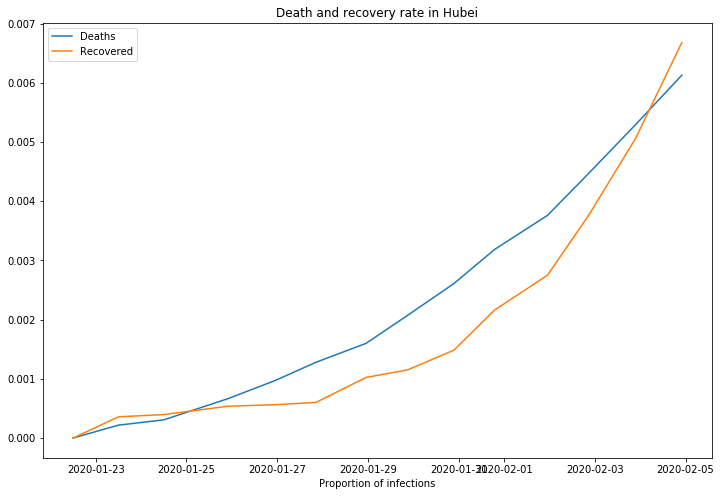

In [297]:
n_infections=china_data.loc[china_data['Province/State']=='Hubei','Confirmed'].sum()
plt.figure(figsize=(12,8))
x=china_data.loc[china_data['Province/State']=='Hubei','Date']
y2=china_data.loc[china_data['Province/State']=='Hubei','Deaths']/n_infections
y3=china_data.loc[china_data['Province/State']=='Hubei','Recovered']/n_infections

plt.plot(x,y2)
plt.plot(x,y3)
plt.title('Death and recovery rate in Hubei')
plt.legend(['Deaths','Recovered'])
plt.xlabel('Proportion of infections')
plt.show()

Very low death and recovery rates, less than 1%

In [204]:
och_provinces=[i for i in ch_provinces if i!='Hubei']
och_provinces

['Anhui',
 'Beijing',
 'Chongqing',
 'Fujian',
 'Gansu',
 'Guangdong',
 'Guangxi',
 'Guizhou',
 'Hainan',
 'Hebei',
 'Heilongjiang',
 'Henan',
 'Hong Kong',
 'Hunan',
 'Inner Mongolia',
 'Jiangsu',
 'Jiangxi',
 'Jilin',
 'Liaoning',
 'Macau',
 'Ningxia',
 'Qinghai',
 'Shaanxi',
 'Shandong',
 'Shanghai',
 'Shanxi',
 'Sichuan',
 'Taiwan',
 'Tianjin',
 'Tibet',
 'Xinjiang',
 'Yunnan',
 'Zhejiang']

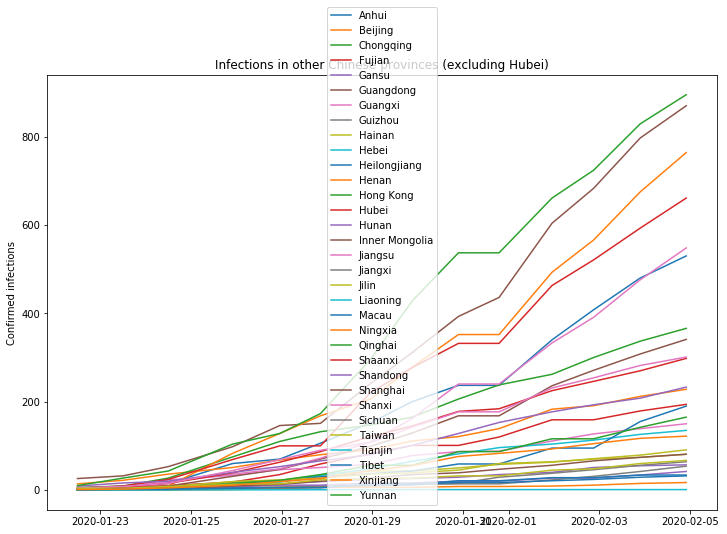

In [298]:
plt.figure(figsize=(12,8))
for province in och_provinces:
    y=china_data.loc[china_data['Province/State']==province,'Confirmed']
    x=china_data.loc[china_data['Province/State']==province,'Date']
    plt.plot(x,y)
    
plt.legend(ch_provinces)
plt.ylabel('Confirmed infections')
plt.title('Infections in other Chinese provinces (excluding Hubei)')
plt.show()

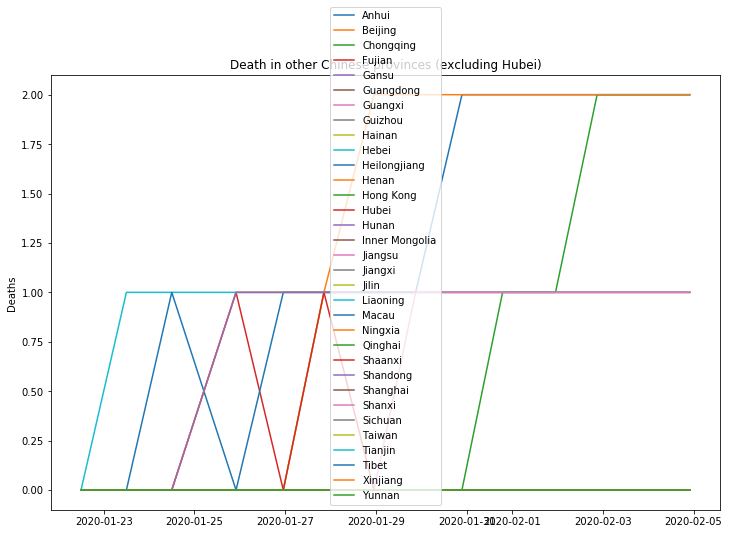

In [299]:
plt.figure(figsize=(12,8))
for province in och_provinces:
    y=china_data.loc[china_data['Province/State']==province,'Deaths']
    x=china_data.loc[china_data['Province/State']==province,'Date']
    plt.plot(x,y)
    
plt.legend(ch_provinces)
plt.ylabel('Deaths')
plt.title('Death in other Chinese provinces (excluding Hubei)')
plt.show()

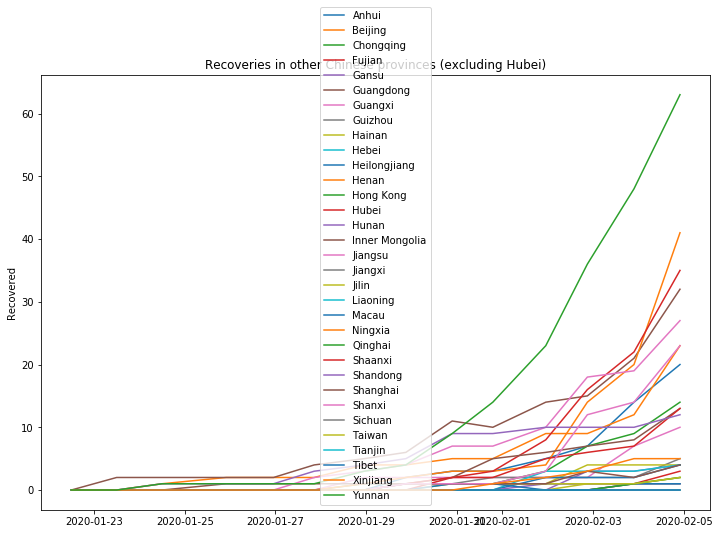

In [300]:
plt.figure(figsize=(12,8))
for province in och_provinces:
    y=china_data.loc[china_data['Province/State']==province,'Recovered']
    x=china_data.loc[china_data['Province/State']==province,'Date']
    plt.plot(x,y)
    
plt.legend(ch_provinces)
plt.ylabel('Recovered')
plt.title('Recoveries in other Chinese provinces (excluding Hubei)')
plt.show()

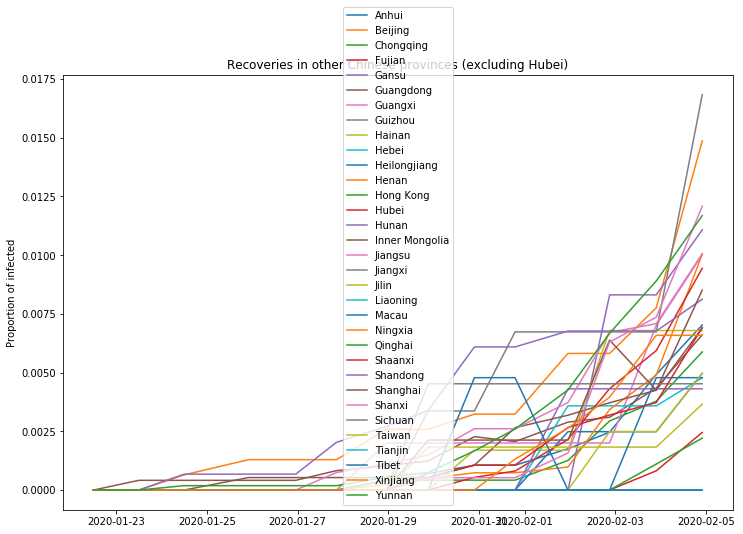

In [302]:
plt.figure(figsize=(12,8))
for province in och_provinces:
    n_infections=china_data.loc[china_data['Province/State']==province,'Confirmed'].sum()
    y=china_data.loc[china_data['Province/State']==province,'Recovered']/n_infections
    x=china_data.loc[china_data['Province/State']==province,'Date']
    plt.plot(x,y)
    
plt.legend(ch_provinces)
plt.ylabel('Proportion of infected')
plt.title('Recoveries in other Chinese provinces (excluding Hubei)')
plt.show()

Recovery rate a little better ouside Hubei, but still low, just reaching 1%

### Spread of infection outside China

In [274]:
country_data=data.groupby(['Country','Date'],as_index=False).agg({'Confirmed':'sum','Deaths':'sum','Recovered':'sum'})

In [275]:
country_data

,Country,Date,Confirmed,Deaths,Recovered
0,Australia,01/23/2020 12:00:00,0.0,0.0,0.0
1,Australia,01/25/2020 22:00:00,4.0,0.0,0.0
2,Australia,01/26/2020 23:00:00,4.0,0.0,0.0
3,Australia,01/27/2020 20:30:00,5.0,0.0,0.0
4,Australia,01/28/2020 23:00:00,5.0,0.0,0.0
...,...,...,...,...,...
271,Vietnam,01/31/2020 19:00:00,2.0,0.0,0.0
272,Vietnam,02/01/2020 23:00:00,6.0,0.0,1.0
273,Vietnam,02/02/2020 21:00:00,6.0,0.0,1.0
274,Vietnam,02/03/2020 21:40:00,8.0,0.0,1.0


In [276]:
country_data['Date']=pd.to_datetime(country_data['Date'])

In [277]:
countries=data.Country.unique()
ocountries=[i for i in countries if (i!='China') & (i!='Mainland China')]

In [278]:
ocountries

['US',
 'Japan',
 'Thailand',
 'South Korea',
 'Hong Kong',
 'Macau',
 'Taiwan',
 'Singapore',
 'Philippines',
 'Malaysia',
 'Vietnam',
 'Australia',
 'Mexico',
 'Brazil',
 'France',
 'Nepal',
 'Canada',
 'Cambodia',
 'Sri Lanka',
 'Ivory Coast',
 'Germany',
 'Finland',
 'United Arab Emirates',
 'India',
 'Italy',
 'Sweden',
 'Russia',
 'Spain',
 'UK',
 'Belgium']

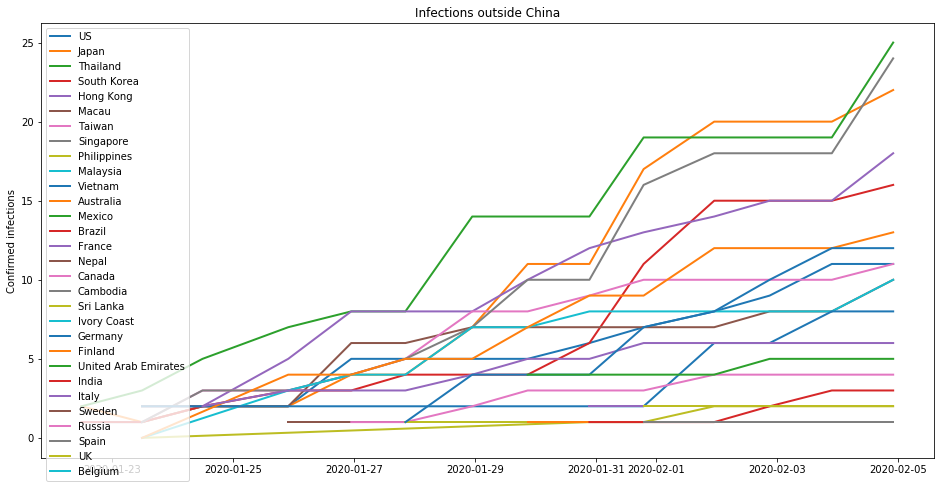

In [303]:
plt.figure(figsize=(16,8))
for country in ocountries:
    y=country_data.loc[country_data['Country']==country,'Confirmed']
    x=country_data.loc[country_data['Country']==country,'Date']
    plt.plot(x,y,lw=2)
    
plt.legend(ocountries)
plt.ylabel('Confirmed infections')
plt.title('Infections outside China')
plt.show()

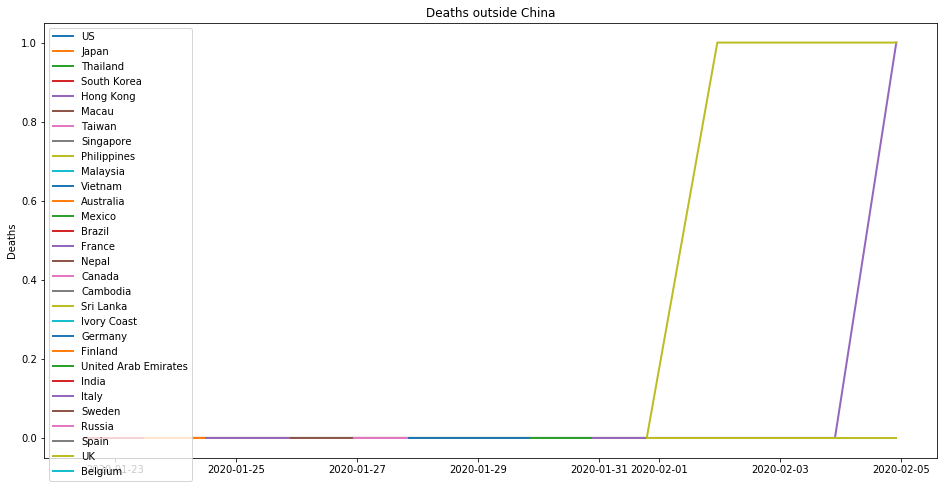

In [304]:
plt.figure(figsize=(16,8))
for country in ocountries:
    y=country_data.loc[country_data['Country']==country,'Deaths']
    x=country_data.loc[country_data['Country']==country,'Date']
    plt.plot(x,y,lw=2)
    
plt.legend(ocountries)
plt.ylabel('Deaths')
plt.title('Deaths outside China')
plt.show()

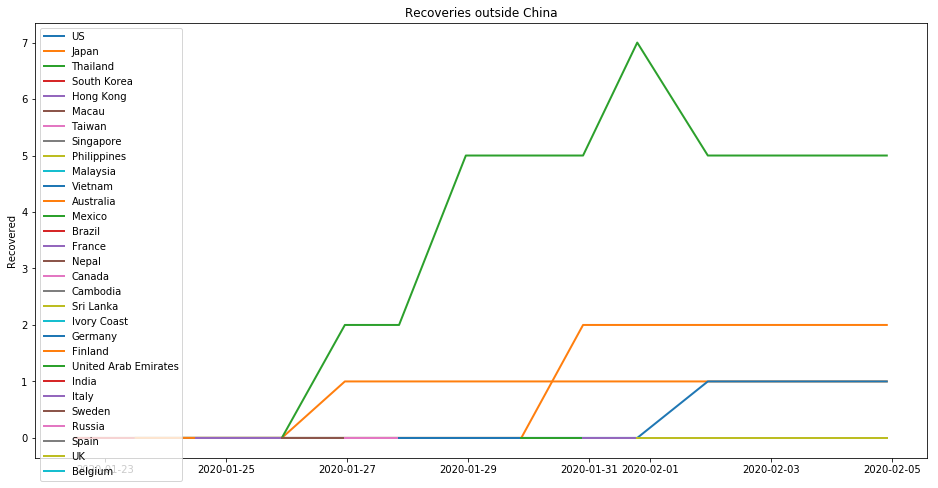

In [305]:
plt.figure(figsize=(16,8))
for country in ocountries:
    y=country_data.loc[country_data['Country']==country,'Recovered']
    x=country_data.loc[country_data['Country']==country,'Date']
    plt.plot(x,y,lw=2)
    
plt.legend(ocountries)
plt.ylabel('Recovered')
plt.title('Recoveries outside China')
plt.show()

In [282]:
country_data.loc[country_data['Country']=='Thailand',:]

,Country,Date,Confirmed,Deaths,Recovered
223,Thailand,2020-01-22 12:00:00,2.0,0.0,0.0
224,Thailand,2020-01-23 12:00:00,3.0,0.0,0.0
225,Thailand,2020-01-24 12:00:00,5.0,0.0,0.0
226,Thailand,2020-01-25 22:00:00,7.0,0.0,0.0
227,Thailand,2020-01-26 23:00:00,8.0,0.0,2.0
228,Thailand,2020-01-27 20:30:00,8.0,0.0,2.0
229,Thailand,2020-01-28 23:00:00,14.0,0.0,5.0
230,Thailand,2020-01-29 21:00:00,14.0,0.0,5.0
231,Thailand,2020-01-30 21:30:00,14.0,0.0,5.0
232,Thailand,2020-01-31 19:00:00,19.0,0.0,7.0


Mis-classification in Thailand about recovery of two patients?

### Spread in Malaysia, Australia and Sg

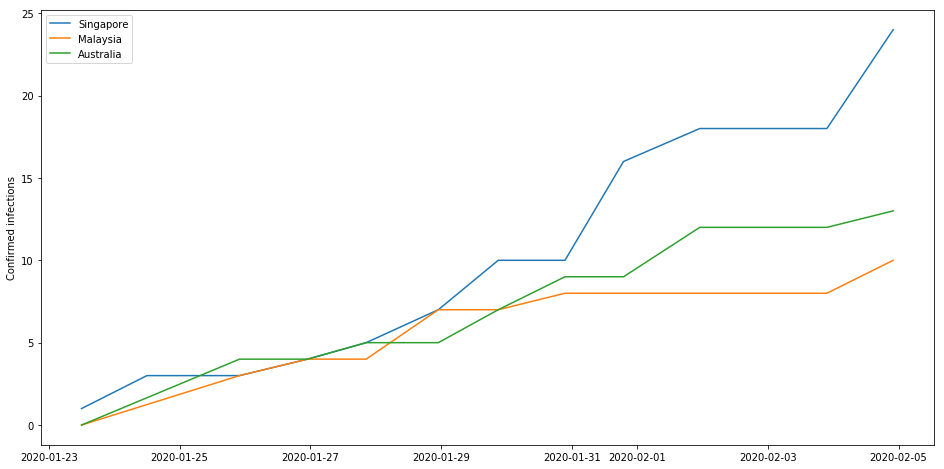

In [306]:
these_countries=['Singapore','Malaysia','Australia']
plt.figure(figsize=(16,8))
for country in these_countries:
    y=country_data.loc[country_data['Country']==country,'Confirmed']
    x=country_data.loc[country_data['Country']==country,'Date']
    plt.plot(x,y)
    
plt.legend(these_countries)
plt.ylabel('Confirmed infections')
plt.show()

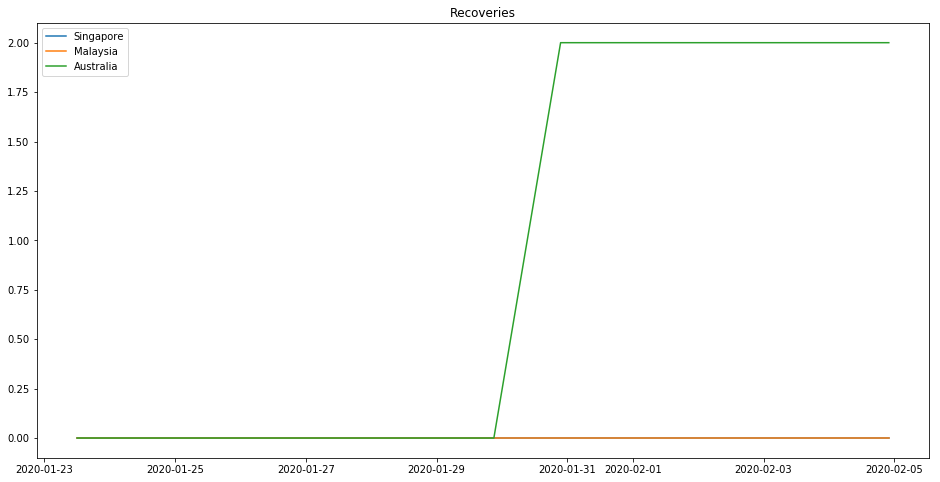

In [307]:
plt.figure(figsize=(16,8))
for country in these_countries:
    y=country_data.loc[country_data['Country']==country,'Recovered']
    x=country_data.loc[country_data['Country']==country,'Date']
    plt.plot(x,y)
    
plt.legend(these_countries)
plt.title('Recoveries')
plt.show()

In [288]:
country_data[country_data['Country']=='Malaysia']

,Country,Date,Confirmed,Deaths,Recovered
128,Malaysia,2020-01-23 12:00:00,0.0,0.0,0.0
129,Malaysia,2020-01-25 22:00:00,3.0,0.0,0.0
130,Malaysia,2020-01-26 23:00:00,4.0,0.0,0.0
131,Malaysia,2020-01-27 20:30:00,4.0,0.0,0.0
132,Malaysia,2020-01-28 23:00:00,7.0,0.0,0.0
133,Malaysia,2020-01-29 21:00:00,7.0,0.0,0.0
134,Malaysia,2020-01-30 21:30:00,8.0,0.0,0.0
135,Malaysia,2020-01-31 19:00:00,8.0,0.0,0.0
136,Malaysia,2020-02-01 23:00:00,8.0,0.0,0.0
137,Malaysia,2020-02-02 21:00:00,8.0,0.0,0.0


#### Based on this exploratory analysis:
- Rate of infection is high in China, but outside China it is much lower.
- Recovery rate is very small. Given the limited data, we do not know if recovery takes a long time, or if recovery rate is indeed very small.